# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# importing the necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import plotly.express as px
from bs4 import BeautifulSoup
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [5]:
df.to_csv("data/BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [2]:
df = pd.read_csv("data/BA_reviews.csv")
df.head(10)

reviews
0  ✅ Trip Verified |   I hate British Airways! We...
1  ✅ Trip Verified |   Our BA flight from Porto t...
2  ✅ Trip Verified | The customer services (call ...
3  ✅ Trip Verified |   I am a frequent flyer with...
4  Not Verified |  Flew with BA to Punta Cana. To...
5  ✅ Trip Verified |   They downgraded me from bu...
6  ✅ Trip Verified |   The already delayed aircra...
7  ✅ Trip Verified |   Caught up in the Gatwick c...
8  ✅ Trip Verified |   BA has a real problem with...
9  ✅ Trip Verified | Our connecting flight from L...

In [3]:
df.shape

(1000, 1)

In [4]:
dataframe = df.copy()
dataframe.head(10)

reviews
0  ✅ Trip Verified |   I hate British Airways! We...
1  ✅ Trip Verified |   Our BA flight from Porto t...
2  ✅ Trip Verified | The customer services (call ...
3  ✅ Trip Verified |   I am a frequent flyer with...
4  Not Verified |  Flew with BA to Punta Cana. To...
5  ✅ Trip Verified |   They downgraded me from bu...
6  ✅ Trip Verified |   The already delayed aircra...
7  ✅ Trip Verified |   Caught up in the Gatwick c...
8  ✅ Trip Verified |   BA has a real problem with...
9  ✅ Trip Verified | Our connecting flight from L...

In [5]:
# stopwords
stopwords_list = stopwords.words("english")
stopwords_list.remove("not")
stopwords_list.remove("wouldn't")
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
wnlemmatizer = WordNetLemmatizer()
# lemmatizing function
def lemmatizer(review):
    lemmatized_words = [wnlemmatizer.lemmatize(word) for word in word_tokenize(review)]
    return " ".join(lemmatized_words)

In [7]:
# function to get rid of stopwords present in the messages
def remove_stopwords(review):
    clean_reviews = [word.lower() for word in review.split() if word.lower() not in stopwords_list and len(word)>3]
    return " ".join(clean_reviews)

In [1]:
# function for preprocessing data
def preprocess(dataf):
    dataf["clean_reviews"] = dataf["reviews"].str.split("|", expand=True)[1] # split the reviews column and select the reviews only
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("[^0-9A-Za-z \t]", " ", regex=True) # remove digits
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("\[.*?\]", " ", regex=True) # remove special characters
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("https?://\S+|www\.\S+", " ", regex=True) # remove web addresses
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("<.*?>+", " ", regex=True) # remove special characters
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("\n", " ", regex=True) # remove new line
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("\w*\d\w*", " ", regex=True) # remove digits between words
    dataf["clean_reviews"] = dataf["clean_reviews"].str.replace("(\d+)", " ", regex=True) # remove digits
    dataf["clean_reviews"] = dataf["clean_reviews"].apply(remove_stopwords) # remove stop words
    dataf["clean_reviews"] = dataf["clean_reviews"].apply(lemmatizer) # lemmatize
    dataf["clean_reviews"] = dataf["clean_reviews"].str.rstrip(" ") # remove blanks at the right end of the reviews
    dataf["clean_reviews"] = dataf["clean_reviews"].str.lstrip(" ") # remove blanks at the left end of the reviews
    return dataf

In [9]:
clean_df = preprocess(dataframe)
clean_df.head(10)

reviews  \
0  ✅ Trip Verified |   I hate British Airways! We...   
1  ✅ Trip Verified |   Our BA flight from Porto t...   
2  ✅ Trip Verified | The customer services (call ...   
3  ✅ Trip Verified |   I am a frequent flyer with...   
4  Not Verified |  Flew with BA to Punta Cana. To...   
5  ✅ Trip Verified |   They downgraded me from bu...   
6  ✅ Trip Verified |   The already delayed aircra...   
7  ✅ Trip Verified |   Caught up in the Gatwick c...   
8  ✅ Trip Verified |   BA has a real problem with...   
9  ✅ Trip Verified | Our connecting flight from L...   

                                       clean_reviews  
0  hate british airway london next flight cancell...  
1  flight porto london heathrow operated finnair ...  
2  customer service call centre atrocious sometim...  
3  frequent flyer last year noted rating given fr...  
4  flew punta cana took trouble reserve seat outb...  
5  downgraded business premium economy took three...  
6  already delayed aircraft landed apart small lo...  
7  caught gatwick cancellation fiasco point smoot...  
8  real problem boarding flight first fill luggag...  
9  connecting flight london glasgow canceled forc...

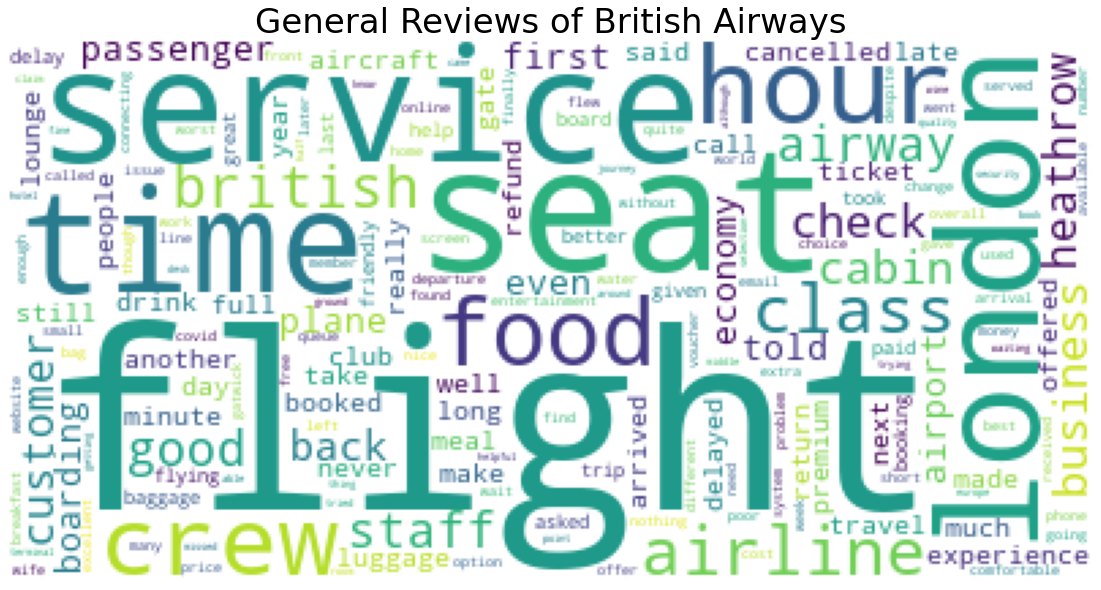

In [10]:
texts = " ".join([word for word in clean_df.clean_reviews])
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords_set, collocations=False, background_color="white").generate_from_text(texts)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("General Reviews of British Airways", fontdict={"fontsize":34})
plt.axis("off")
plt.show()

In [11]:
senti_analyzer = SentimentIntensityAnalyzer()

In [19]:
sentiment = []
for review in clean_df["clean_reviews"]:
    senti_result = senti_analyzer.polarity_scores(review)
    if senti_result["compound"] >= 0.05:
        sentiment.append("positive")
    elif senti_result["compound"] <= -0.05:
        sentiment.append("negative")
    else:
        sentiment.append("neutral")

In [20]:
clean_df["sentiment"] = sentiment
clean_df.head()

reviews  \
0  ✅ Trip Verified |   I hate British Airways! We...   
1  ✅ Trip Verified |   Our BA flight from Porto t...   
2  ✅ Trip Verified | The customer services (call ...   
3  ✅ Trip Verified |   I am a frequent flyer with...   
4  Not Verified |  Flew with BA to Punta Cana. To...   

                                       clean_reviews sentiment  
0  hate british airway london next flight cancell...  negative  
1  flight porto london heathrow operated finnair ...  positive  
2  customer service call centre atrocious sometim...  negative  
3  frequent flyer last year noted rating given fr...  positive  
4  flew punta cana took trouble reserve seat outb...  positive

In [21]:
pos = clean_df[clean_df["sentiment"]=="positive"]

In [22]:
neu = clean_df[clean_df["sentiment"]=="neutral"]

In [23]:
neg = clean_df[clean_df["sentiment"]=="negative"]

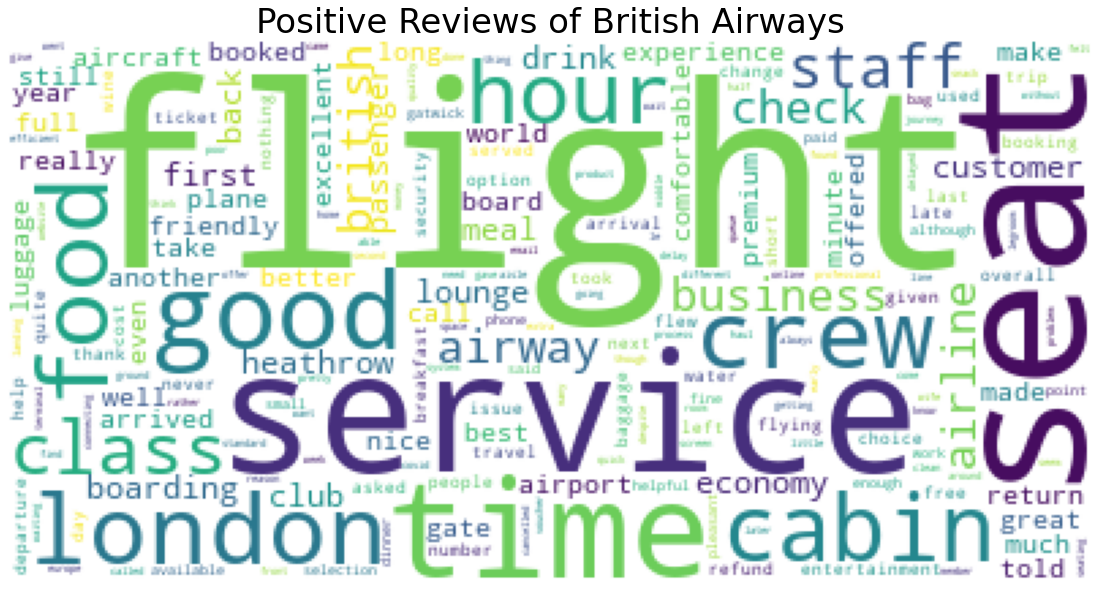

In [24]:
texts = " ".join([word for word in pos.clean_reviews])
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords_set, collocations=False, background_color="white").generate_from_text(texts)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Positive Reviews of British Airways", fontdict={"fontsize":34})
plt.axis("off")
plt.show()

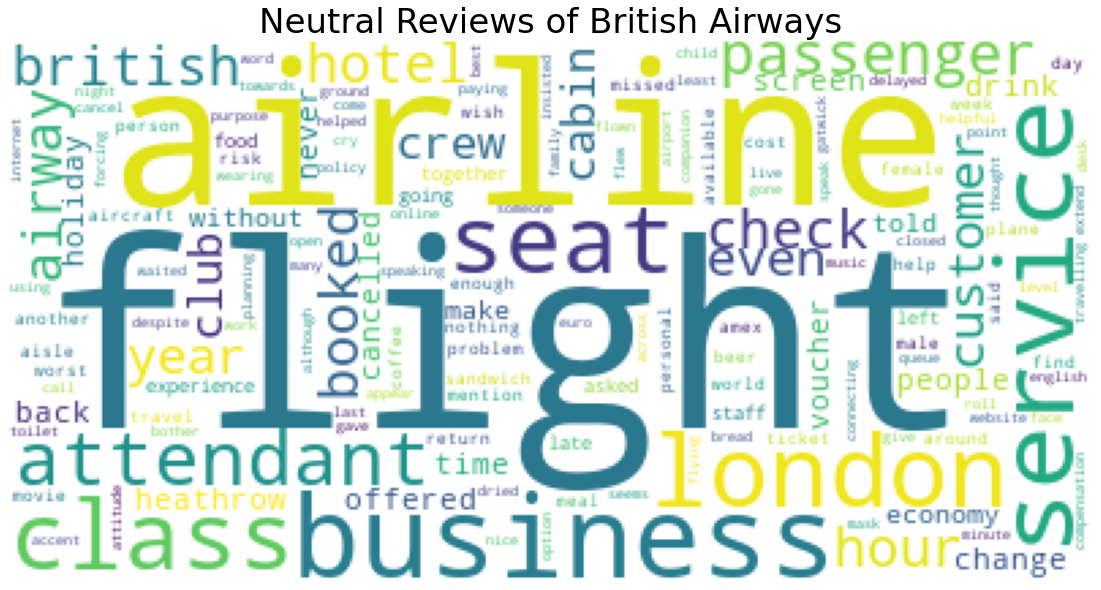

In [25]:
texts = " ".join([word for word in neu.clean_reviews])
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords_set, collocations=False, background_color="white").generate_from_text(texts)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Neutral Reviews of British Airways", fontdict={"fontsize":34})
plt.axis("off")
plt.show()

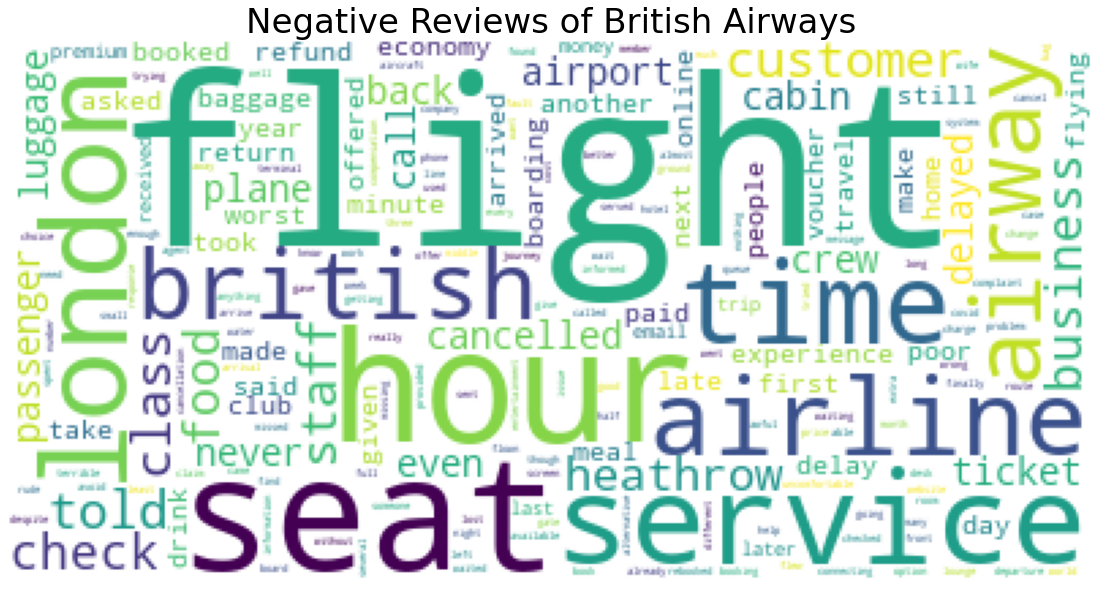

In [26]:
texts = " ".join([word for word in neg.clean_reviews])
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords_set, collocations=False, background_color="white").generate_from_text(texts)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Negative Reviews of British Airways", fontdict={"fontsize":34})
plt.axis("off")
plt.show()

In [27]:
clean_df.drop(["reviews"], axis=1, inplace=True)

In [28]:
px.pie(data_frame=clean_df, names="sentiment", hole=0.8)

In [29]:
clean_df["sentiment"].value_counts()

positive    576
negative    404
neutral      20
Name: sentiment, dtype: int64